    ### Malaria Cell Image Dataset 
    ### Kaggle Exercise 
    ### Check out: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria#cell_images.zip

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import keras

import os
print(os.listdir("C:\\Users\\rhasan\\Downloads\\cell-images-for-detecting-malaria\\cell_images"))
directory = "C:\\Users\\rhasan\\Downloads\\cell-images-for-detecting-malaria\\cell_images"

['Parasitized', 'Uninfected']


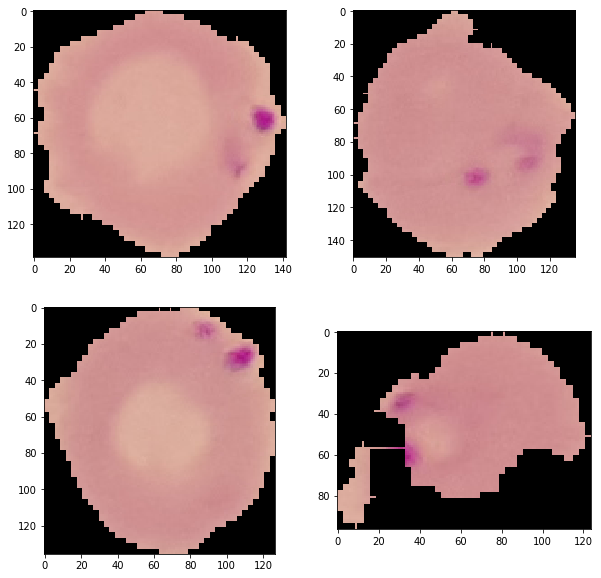

In [5]:
lst = [162+i for i in range(4)]
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(10,10))
for i in enumerate(lst):
    img = plt.imread("C:\\Users\\rhasan\\Downloads\\cell-images-for-detecting-malaria\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_145042_cell_"+str(i[1])+".png")
    ax=axes[i[0]//n_row,i[0]%n_col]
    ax.imshow(img)

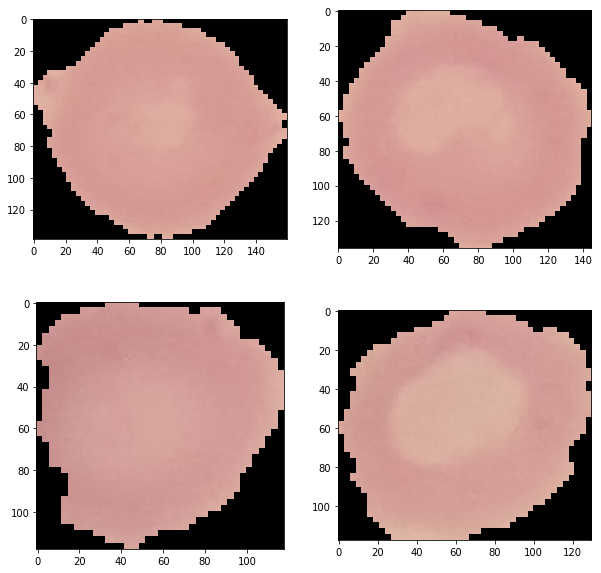

In [6]:
lst = [128,131,34,65]
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(10,10))
for i in enumerate(lst):
    img = plt.imread("C:\\Users\\rhasan\\Downloads\\cell-images-for-detecting-malaria\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_"+str(i[1])+".png")
    ax=axes[i[0]//n_row,i[0]%n_col]
    ax.imshow(img)

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(120, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(220, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(220, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(320, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,width_shift_range=0.2,\
                                  height_shift_range=0.2,shear_range=0.3,zoom_range=0.2)

train_generator = train_datagen.flow_from_directory(directory, target_size=(128,128), batch_size=50, class_mode='binary')
validation_generator = train_datagen.flow_from_directory(directory, target_size=(128,128),batch_size=50, class_mode='binary')

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [12]:
#change no. of steps_per_epochs & epochs based on computing power
#my laptop has 8GB RAM
history = model.fit_generator(train_generator, steps_per_epoch=1, epochs=5,\
                              validation_data=validation_generator,validation_steps=5)

Epoch 1/5
1/1 [==============================] - 28s 28s/step - loss: 0.6805 - acc: 0.5400 - val_loss: 0.6996 - val_acc: 0.4640
Epoch 2/5
1/1 [==============================] - 26s 26s/step - loss: 0.6701 - acc: 0.5600 - val_loss: 0.7149 - val_acc: 0.4240
Epoch 3/5
1/1 [==============================] - 29s 29s/step - loss: 0.7083 - acc: 0.4200 - val_loss: 0.7134 - val_acc: 0.5000
Epoch 4/5
1/1 [==============================] - 36s 36s/step - loss: 0.7032 - acc: 0.5200 - val_loss: 0.6830 - val_acc: 0.5640
Epoch 5/5
1/1 [==============================] - 34s 34s/step - loss: 0.6841 - acc: 0.6000 - val_loss: 0.6850 - val_acc: 0.5400


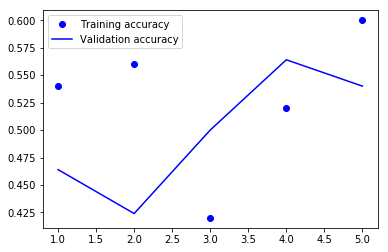

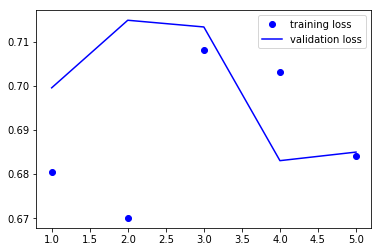

In [13]:
acur = history.history['acc']
val_acur = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acur)+1)
plt.plot(epochs,acur,'bo',label='Training accuracy')
plt.plot(epochs, val_acur,'b',label='Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.legend()
plt.show()